In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
data=pd.read_csv('parkinson-data.data')

In [149]:
data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


<AxesSubplot:>

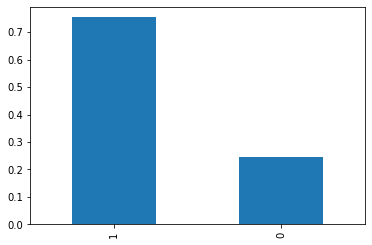

In [150]:
data.status.value_counts(normalize=True).plot(kind='bar')

In [151]:
data=data.sample(frac=1).reset_index(drop=False)

<AxesSubplot:>

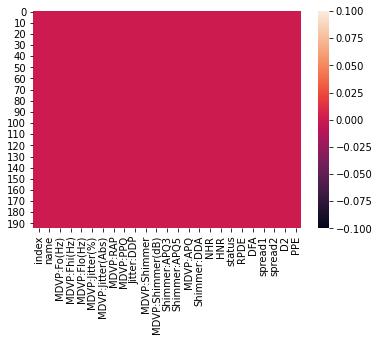

In [152]:
sns.heatmap(data.isnull())

In [153]:
#PCA Attempt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             195 non-null    int64  
 1   name              195 non-null    object 
 2   MDVP:Fo(Hz)       195 non-null    float64
 3   MDVP:Fhi(Hz)      195 non-null    float64
 4   MDVP:Flo(Hz)      195 non-null    float64
 5   MDVP:Jitter(%)    195 non-null    float64
 6   MDVP:Jitter(Abs)  195 non-null    float64
 7   MDVP:RAP          195 non-null    float64
 8   MDVP:PPQ          195 non-null    float64
 9   Jitter:DDP        195 non-null    float64
 10  MDVP:Shimmer      195 non-null    float64
 11  MDVP:Shimmer(dB)  195 non-null    float64
 12  Shimmer:APQ3      195 non-null    float64
 13  Shimmer:APQ5      195 non-null    float64
 14  MDVP:APQ          195 non-null    float64
 15  Shimmer:DDA       195 non-null    float64
 16  NHR               195 non-null    float64
 1

In [155]:
data.drop(columns=['name'],axis=1,inplace=True)

In [156]:
x=data.iloc[:,data.columns!='status']
y=data['status']

In [157]:
from sklearn.preprocessing import StandardScaler
ssl=StandardScaler()
x=ssl.fit_transform(x)

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [159]:
pca=PCA(n_components=2)
x1=pca.fit_transform(x)
pcd=pd.DataFrame(data=x1,columns=['pc1','pc2'])

In [160]:
pcd.tail()

,pc1,pc2
190,0.738702,-0.976039
191,0.895228,-0.417025
192,-1.867440,-0.274087
193,-0.082791,-0.123073
194,2.039896,-1.408997


In [161]:
x1=pcd.iloc[:,[0,1]].values
y1=data['status'].values

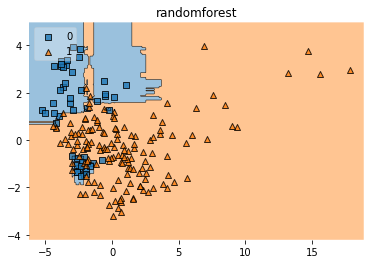

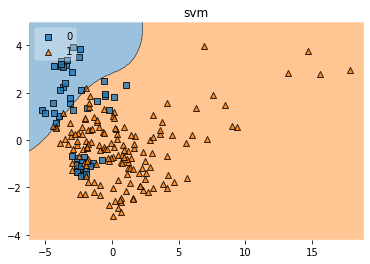

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


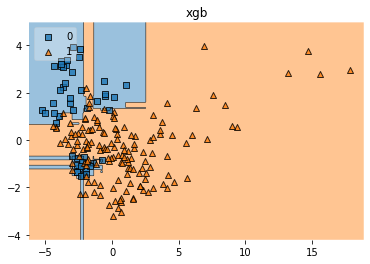

In [162]:
from mlxtend.plotting import plot_decision_regions
rf=RandomForestClassifier()
sv=svm.SVC()
xgb=XGBClassifier()
clfs=[rf,sv,xgb]
label=['randomforest','svm','xgb']
for clf,lab in zip(clfs,label):
    clf.fit(x1,y1)
    plot_decision_regions(X=x1,y=y1,clf=clf,legend=2)
    plt.title(lab)
    plt.show()

In [163]:
from imblearn.over_sampling import RandomOverSampler

In [164]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [165]:
#svm
kernel=['rbf','poly','sigmoid']
C=[50,10,100,0.1]
grid=dict(kernel=kernel,C=C)
cv=RepeatedStratifiedKFold(n_splits=6,random_state=1)
grid_search=GridSearchCV(estimator=sv,cv=cv,param_grid=grid,scoring='accuracy')
grid_result=grid_search.fit(x1,y1)
grid_result.best_params_

{'C': 100, 'kernel': 'rbf'}

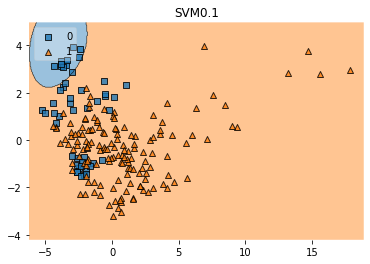

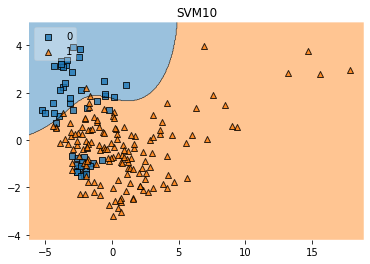

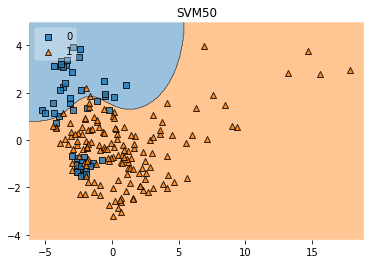

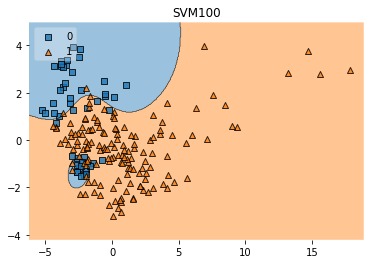

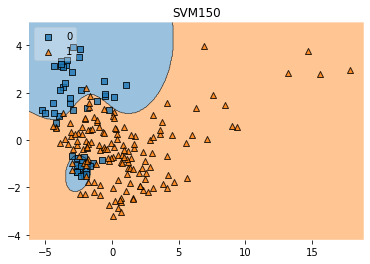

In [166]:
c=[0.1,10,50,100,150]
for i in c:
    mod1=svm.SVC(C=i,kernel='rbf')
    mod1.fit(x1,y1)
    plot_decision_regions(X=x1,y=y1,clf=mod1,legend=2)
    plt.title('SVM{}'.format(i))
    plt.show()

In [167]:
def fun1():
    kernel=['rbf','poly','sigmoid']
    C=[50,10,100,0.1,150]
    grid=dict(kernel=kernel,C=C)
    cv=RepeatedStratifiedKFold(n_splits=6,random_state=1)
    grid_search=GridSearchCV(estimator=sv,cv=cv,param_grid=grid,scoring='accuracy')
    grid_result=grid_search.fit(x1,y1)
    means=grid_result.cv_results_['mean_test_score']
    params=grid_result.cv_results_['params']
    for mean,param in zip(means,params):
        print(mean,param)
fun1()

0.858096590909091 {'C': 50, 'kernel': 'rbf'}
0.855050505050505 {'C': 50, 'kernel': 'poly'}
0.6639362373737374 {'C': 50, 'kernel': 'sigmoid'}
0.8601957070707071 {'C': 10, 'kernel': 'rbf'}
0.852477904040404 {'C': 10, 'kernel': 'poly'}
0.6814867424242423 {'C': 10, 'kernel': 'sigmoid'}
0.8667455808080808 {'C': 100, 'kernel': 'rbf'}
0.8549558080808081 {'C': 100, 'kernel': 'poly'}
0.6623895202020201 {'C': 100, 'kernel': 'sigmoid'}
0.7666193181818183 {'C': 0.1, 'kernel': 'rbf'}
0.8456597222222222 {'C': 0.1, 'kernel': 'poly'}
0.7537878787878789 {'C': 0.1, 'kernel': 'sigmoid'}
0.875015782828283 {'C': 150, 'kernel': 'rbf'}
0.8544191919191919 {'C': 150, 'kernel': 'poly'}
0.6660511363636363 {'C': 150, 'kernel': 'sigmoid'}


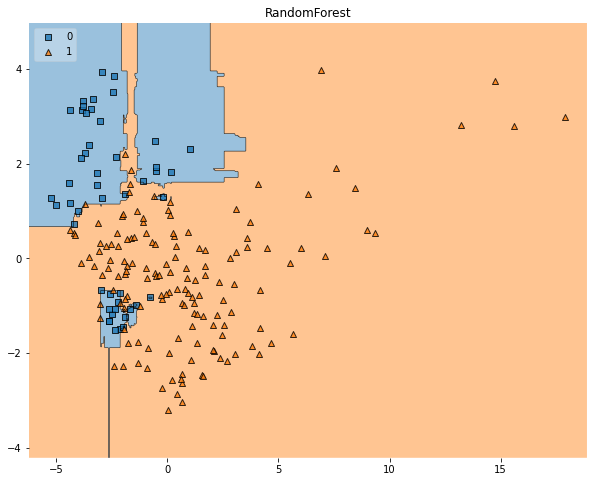

In [168]:
rf2=RandomForestClassifier(n_estimators=1000)
rf2.fit(x1,y1)
plt.figure(figsize=(10,8))
plot_decision_regions(X=x1,y=y1,clf=rf2,legend=2)
plt.title('RandomForest')
plt.show()

In [169]:
rf2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [170]:
k=rf2.predict(x_test)

In [171]:
from sklearn.metrics import f1_score
f1_score(k,y_test)

0.9473684210526316

In [172]:
sv2=svm.SVC(C=150,kernel='rbf')
sv2.fit(x_train,y_train)

SVC(C=150)

In [173]:
l=sv2.predict(x_test)
f1_score(l,y_test)

1.0

In [174]:
pcd.head()

,pc1,pc2
0,1.171964,-1.160420
1,0.086435,-0.710591
2,-1.626635,0.424224
3,-2.600941,-0.751846
4,15.623959,2.798483


In [175]:
pcy=pd.DataFrame(data=data['status'])

In [176]:
pcadata=pd.concat([pcd,pcy],axis=1)

In [177]:
pcadata.tail()

,pc1,pc2,status
190,0.738702,-0.976039,1
191,0.895228,-0.417025,1
192,-1.867440,-0.274087,1
193,-0.082791,-0.123073,1
194,2.039896,-1.408997,1


In [178]:
x2=pcadata.iloc[:,pcadata.columns!='status']
y2=pcadata['status']

In [179]:
print(x2.shape)
print(y2.shape)

(195, 2)
(195,)


In [180]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2)

In [181]:
rf2.fit(x_train2,y_train2)

RandomForestClassifier(n_estimators=1000)

In [182]:
u=rf2.predict(x_test2)
f1_score(u,y_test2)

0.9500000000000001

In [183]:
sv2.fit(x_train2,y_train2)

SVC(C=150)

In [184]:
p=sv2.predict(x_test2)
f1_score(p,y_test2)

0.9230769230769231

In [185]:
import tensorflow as tf

In [186]:
from keras.layers import Dense

In [187]:
from keras.models import Sequential
print(x_train.shape)

(146, 23)


In [188]:
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(12,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [189]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                384       
_________________________________________________________________
dense_25 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 26        
Total params: 614
Trainable params: 614
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [201]:
model.fit(x=x_train,y=y_train,epochs=4,batch_size=4)

Epoch 1/4


ValueError: in user code:

    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


In [202]:
nn=model.predict(x_test)

In [203]:
nn

array([[0.48351684, 0.5164832 ],
       [0.42027542, 0.5797246 ],
       [0.7285413 , 0.27145877],
       [0.5673015 , 0.4326985 ],
       [0.48257774, 0.51742226],
       [0.42950195, 0.57049805],
       [0.33794093, 0.6620591 ],
       [0.827652  , 0.17234801],
       [0.54733634, 0.45266363],
       [0.43144757, 0.56855243],
       [0.9748737 , 0.02512629],
       [0.5875184 , 0.41248164],
       [0.92472076, 0.07527921],
       [0.5780545 , 0.42194554],
       [0.70219755, 0.29780242],
       [0.37453645, 0.62546355],
       [0.37925377, 0.6207462 ],
       [0.33515954, 0.6648404 ],
       [0.5473928 , 0.45260724],
       [0.54530764, 0.45469233],
       [0.2848017 , 0.7151983 ],
       [0.43070978, 0.5692903 ],
       [0.33713827, 0.6628617 ],
       [0.7873583 , 0.21264167],
       [0.65822226, 0.34177774],
       [0.8180951 , 0.18190496],
       [0.9239435 , 0.07605652],
       [0.8397923 , 0.16020767],
       [0.62446654, 0.37553343],
       [0.5367415 , 0.46325853],
       [0.

In [204]:
pred=[]
for i in range(len(nn)):
    pred.append(np.argmax(nn[i]))

In [205]:
f1_score(pred,y_test)

0.509090909090909